<a href="https://colab.research.google.com/github/Almuzhidul/Ekstrakurikuler-Coding-SMA-Saint-John/blob/main/Minggu_11_Pengenalan_Data_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**🎯 Tujuan Pembelajaran**
- Memahami apa itu data time series (data deret waktu).

- Mengenal format waktu di Python menggunakan Pandas (datetime).

- Melakukan analisis dasar, seperti agregasi dan resampling (mengelompokkan data per hari/bulan, dll).


In [6]:
# 📚 Persiapan: Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

##**🕒 1. Apa Itu Data Time Series?**
Data time series adalah data yang dicatat berdasarkan urutan waktu, misalnya:

Suhu harian

Jumlah pengunjung toko per bulan

Nilai tukar setiap minggu

##**📅 2. Membuat Data Time Series Sederhana**

In [2]:
# Contoh: Suhu harian selama 10 hari
data = {
    "Tanggal": pd.date_range(start="2024-01-01", periods=10, freq="D"),
    "Suhu": [28, 29, 30, 32, 33, 31, 29, 27, 26, 28]
}

df = pd.DataFrame(data)
df

,Tanggal,Suhu
0,2024-01-01,28
1,2024-01-02,29
2,2024-01-03,30
3,2024-01-04,32
4,2024-01-05,33
5,2024-01-06,31
6,2024-01-07,29
7,2024-01-08,27
8,2024-01-09,26
9,2024-01-10,28


##**⏱️ 3. Format Waktu dengan datetime**

In [3]:
# Pastikan kolom Tanggal adalah format datetime
print("Tipe data sebelum:", type(df["Tanggal"][0]))

df["Tanggal"] = pd.to_datetime(df["Tanggal"])

print("Tipe data sesudah:", type(df["Tanggal"][0]))

Tipe data sebelum: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Tipe data sesudah: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


##**📈 4. Plot Data Time Series**

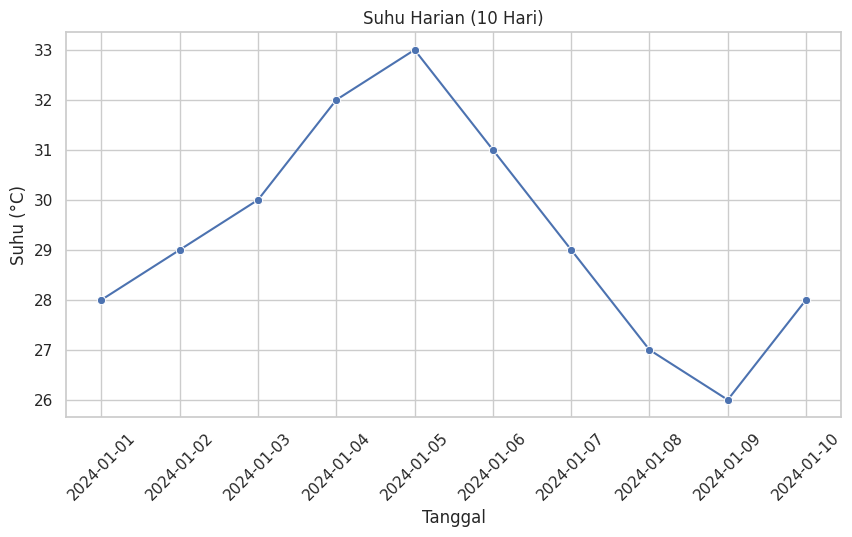

In [4]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Tanggal", y="Suhu", data=df, marker="o")
plt.title("Suhu Harian (10 Hari)")
plt.xlabel("Tanggal")
plt.ylabel("Suhu (°C)")
plt.xticks(rotation=45)
plt.show()

#**🔄 5. Analisis Dasar: Resampling & Agregasi**
Misalnya, jika kita punya data suhu per jam, kita bisa ubah jadi per hari rata-rata.

###Simulasi Data Per Jam:

In [7]:
# Data suhu tiap jam selama 3 hari
date_rng = pd.date_range(start="2024-01-01", end="2024-01-04", freq="H")
suhu_data = pd.DataFrame({
    "Waktu": date_rng,
    "Suhu": 28 + (np.random.randn(len(date_rng)) * 2)  # variasi acak
})

suhu_data.head()

<ipython-input-7-55a3f75eb412>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start="2024-01-01", end="2024-01-04", freq="H")


,Waktu,Suhu
0,2024-01-01 00:00:00,28.393152
1,2024-01-01 01:00:00,27.780862
2,2024-01-01 02:00:00,28.572073
3,2024-01-01 03:00:00,30.494425
4,2024-01-01 04:00:00,28.990320


###📉 Grafik Data Per Jam

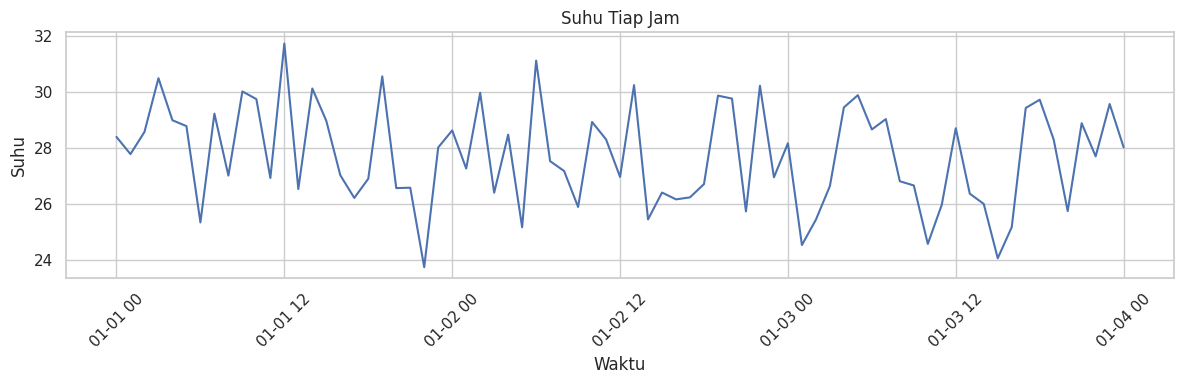

In [8]:
plt.figure(figsize=(12, 4))
sns.lineplot(x="Waktu", y="Suhu", data=suhu_data)
plt.title("Suhu Tiap Jam")
plt.xlabel("Waktu")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###📊 Resampling: Rata-rata per Hari

In [9]:
# Ubah 'Waktu' jadi index agar bisa di-resample
suhu_data.set_index("Waktu", inplace=True)

# Rata-rata per hari
suhu_per_hari = suhu_data.resample("D").mean()

suhu_per_hari

,Suhu
Waktu,
2024-01-01,28.093292
2024-01-02,27.731651
2024-01-03,27.310415
2024-01-04,28.022605


###🔁 Plot Hasil Resampling

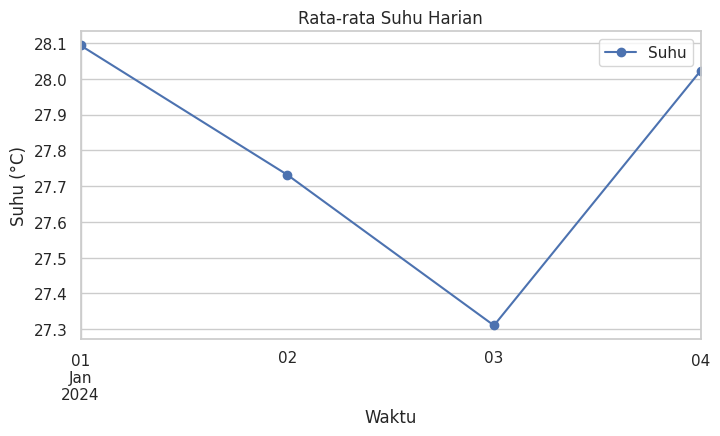

In [10]:
suhu_per_hari.plot(figsize=(8,4), marker='o', title="Rata-rata Suhu Harian")
plt.ylabel("Suhu (°C)")
plt.grid(True)
plt.show()

##**🧠 Kesimpulan:**
Time Series = data berdasarkan waktu

datetime = format waktu di Python

Kita bisa visualisasikan, kelompokkan, dan analisis data berdasarkan waktu